In [1]:
%matplotlib inline

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot

import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
import random
import json

In [7]:
data = pd.read_csv("../crawling/data/total_google_play.csv", header=None)
data.head()

,0,1,2,3,4
0,invaders.os.galaxy.space.shooter.attack.classic,양희선,2019년 10월 12일,광고를 열 수 없다고 계속 진행되서 게임을 다시 지우고 깔았더니 3개월전 상태로 돌...,1
1,invaders.os.galaxy.space.shooter.attack.classic,이한란,2019년 10월 20일,대체 한달이 넘은거 갔네요.. 광고를 이용할수가 없다고 하고 게임시 승리점수도 적립...,1
2,invaders.os.galaxy.space.shooter.attack.classic,jinil kim,2019년 10월 16일,정말 재밌는 슛팅 게임입니다. 어렸을적 오락실 생각도 나고... 여튼 잠시나마 스트...,4
3,invaders.os.galaxy.space.shooter.attack.classic,Bum Chan Park,2019년 10월 9일,광고보기 안되는 오류 좀 못고치나요? 하루이틀도 아니고 아님 없애든가 이건뭐 열받아...,1
4,invaders.os.galaxy.space.shooter.attack.classic,이맹구,2019년 10월 9일,2틀전부터 팀에 접속도 안되고 pvp도 안되고 광고 동영상도 안되고 지우고 깔아도 ...,1


In [9]:
data.describe()

,4
count,1.026621e+06
mean,3.663737e+00
std,1.618107e+00
min,1.000000e+00
25%,2.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


(array([220764.,      0.,  51518.,      0.,      0.,  95495.,      0.,
        143236.,      0., 515608.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

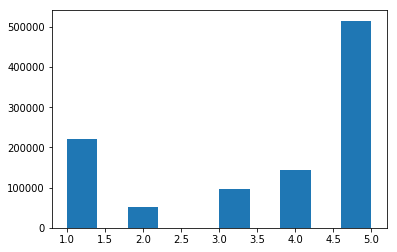

In [10]:
plt.hist(data[4])

In [12]:
score2sent = ['', 'neg', 'neg', 'nat', 'pos', 'pos']
sent = data[4].map(lambda x: score2sent[x])
data['y'] = sent

In [17]:
counter = Counter(data.y)

In [18]:
counter.most_common()

[('pos', 658844), ('neg', 272282), ('nat', 95495)]

In [19]:
pos_rows = data[data.y == 'pos']
neg_rows = data[data.y == 'neg']
nat_rows = data[data.y == 'nat']

In [23]:
num_samples = len(nat_rows)
pos_samples = pos_rows.sample(n=num_samples)
neg_samples = neg_rows.sample(n=num_samples)

In [24]:
print(len(pos_samples), len(neg_samples), len(nat_rows))

95495 95495 95495


In [26]:
sample = pd.concat([pos_samples, neg_samples, nat_rows])

In [76]:
sample.iloc[5, :]

0     com.gamepub.ss.g
1                  이경석
2         2019년 9월 19일
3    쉬우면서 재밌음 케릭이 귀엽군요
4                    4
y                  pos
Name: 19763, dtype: object

In [28]:
%%time
char_counter = Counter()

for row in data.itertuples(index=False):
    text = row[3]
    char_counter.update(list(text))

char_counter.most_common(50)

[(' ', 10874630),
 ('이', 1375671),
 ('.', 1325496),
 ('요', 1207196),
 ('고', 1142063),
 ('는', 997527),
 ('다', 941321),
 ('하', 792846),
 ('게', 759760),
 ('어', 700980),
 ('가', 697736),
 ('도', 610145),
 ('데', 598128),
 ('니', 597073),
 ('지', 562612),
 ('아', 550854),
 ('있', 498617),
 ('서', 464654),
 ('임', 460995),
 ('재', 441906),
 ('!', 431293),
 ('나', 406417),
 ('에', 392736),
 ('해', 386721),
 ('그', 370190),
 ('면', 368791),
 ('만', 361755),
 ('기', 355291),
 ('로', 333735),
 ('네', 332151),
 ('리', 329359),
 ('은', 323542),
 ('을', 319239),
 ('시', 318341),
 ('무', 318187),
 ('주', 279016),
 ('미', 278741),
 ('안', 275221),
 ('한', 265971),
 ('들', 265200),
 ('좋', 263387),
 ('제', 260878),
 ('거', 248776),
 ('라', 234763),
 ('보', 226833),
 ('너', 224127),
 ('으', 221818),
 ('?', 215228),
 ('스', 210075),
 ('정', 202168)]

In [29]:
len(char_counter)

2971

In [37]:
chars = char_counter.most_common()
chars.insert(0, ('<pad>', 1))
chars2idx = {c[0]: i for i, c in enumerate(chars)}

In [38]:
chars2idx

{'<pad>': 0,
 ' ': 1,
 '이': 2,
 '.': 3,
 '요': 4,
 '고': 5,
 '는': 6,
 '다': 7,
 '하': 8,
 '게': 9,
 '어': 10,
 '가': 11,
 '도': 12,
 '데': 13,
 '니': 14,
 '지': 15,
 '아': 16,
 '있': 17,
 '서': 18,
 '임': 19,
 '재': 20,
 '!': 21,
 '나': 22,
 '에': 23,
 '해': 24,
 '그': 25,
 '면': 26,
 '만': 27,
 '기': 28,
 '로': 29,
 '네': 30,
 '리': 31,
 '은': 32,
 '을': 33,
 '시': 34,
 '무': 35,
 '주': 36,
 '미': 37,
 '안': 38,
 '한': 39,
 '들': 40,
 '좋': 41,
 '제': 42,
 '거': 43,
 '라': 44,
 '보': 45,
 '너': 46,
 '으': 47,
 '?': 48,
 '스': 49,
 '정': 50,
 '광': 51,
 '수': 52,
 '인': 53,
 '되': 54,
 '0': 55,
 '자': 56,
 '밌': 57,
 '없': 58,
 '세': 59,
 '사': 60,
 'ㅋ': 61,
 '전': 62,
 '오': 63,
 '드': 64,
 '습': 65,
 '할': 66,
 '~': 67,
 '를': 68,
 '터': 69,
 '같': 70,
 '려': 71,
 'ㅠ': 72,
 '것': 73,
 '음': 74,
 '구': 75,
 '1': 76,
 '많': 77,
 '좀': 78,
 '레': 79,
 '진': 80,
 '대': 81,
 '개': 82,
 '까': 83,
 '때': 84,
 '트': 85,
 '계': 86,
 '간': 87,
 '짜': 88,
 '저': 89,
 '말': 90,
 ',': 91,
 '여': 92,
 '상': 93,
 '했': 94,
 '건': 95,
 '마': 96,
 '래': 97,
 '더': 98,
 '부': 99,
 '겠': 

In [40]:
with open("data/vocab.json", 'w') as out:
    out.write(json.dumps(chars2idx, indent=4))

In [78]:
SEQ_LEN = 256

def encode(text, y):
    text = list(text)
    encoded = [chars2idx[c] for c in text]
    if len(encoded) < SEQ_LEN:
        encoded += [0] * (SEQ_LEN - len(encoded))
#         for i in range(len(encoded) - SEQ_LEN):
#             encoded.append(0)
    if len(encoded) > SEQ_LEN:
        encoded = encoded[:SEQ_LEN]
    encoded.insert(0, y)
    return encoded

result = [encode(row[3], row[5]) for row in sample.itertuples(index=False)]

In [79]:
result = pd.DataFrame(result).sample(frac=1)

In [80]:
sample_size = 30000

result_train = result.loc[:len(result)-30000, :]
result_test = result.loc[len(result)-30000:, :]

In [81]:
result_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256
59188,pos,343,170,24,18,1,20,57,30,4,61,61,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
198152,nat,166,42,124,2,44,26,1,76,3,283,49,817,2,1,151,26,23,1,89,133,2,1,54,15,110,65,14,7,3,1,118,3,9,19,89,133,33,1,8,71,5,8,26,1,29,404,27,1,54,5,1,89,133,2,1,38,388,14,7,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
236079,nat,25,97,267,1,178,419,3,1,45,354,159,32,1,314,34,99,69,1,2,331,85,1,8,163,13,1,2,159,32,1,58,6,272,3,1,159,2,1,369,87,254,328,39,13,1,146,104,2,26,1,81,360,1,634,3,1,586,37,68,1,140,216,483,3,1,45,49,1,427,151,102,64,1,58,10,18,1,88,239,1,77,2,1,22,18,1,246,33,52,12,437,74,3,1,104,135,32,1,25,177,1,199,209,209,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
98579,neg,16,14,1,9,19,1,38,40,10,11,208,18,1,258,56,28,1,75,232,1,29,25,53,1,38,54,30,4,1,24,108,78,1,42,183,1,24,36,59,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
217953,nat,7,156,95,7,1,311,316,32,13,1,79,200,1,194,76,50,12,54,18,1,325,29,148,1,133,165,91,285,64,1,163,62,226,929,214,8,6,13,1,265,1,163,62,1,45,49,706,579,23,18,1,302,2,44,24,101,1,54,22,1,126,87,23,1,104,10,22,18,1,25,127,6,13,1,10,238,9,1,78,1,24,36,59,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
result_train.iloc[5, :]

0      nat
1       20
2       37
3        6
4        1
5      116
6      103
7        1
8       17
9       10
10       4
11     162
12      13
13       1
14       8
15       6
16     185
17     342
18       2
19       1
20      10
21      71
22     158
23       4
24       0
25       0
26       0
27       0
28       0
29       0
      ... 
283    NaN
284    NaN
285    NaN
286    NaN
287    NaN
288    NaN
289    NaN
290    NaN
291    NaN
292    NaN
293    NaN
294    NaN
295    NaN
296    NaN
297    NaN
298    NaN
299    NaN
300    NaN
301    NaN
302    NaN
303    NaN
304    NaN
305    NaN
306    NaN
307    NaN
308    NaN
309    NaN
310    NaN
311    NaN
312    NaN
Name: 269977, Length: 313, dtype: object

In [82]:
result_train.to_csv("data/sample_train.csv", index=False, header=False)
result_test.to_csv("data/sample_test.csv", index=False, header=False)